In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel(r"C:\Users\chris\Downloads\coffee-house-satisfactory-survey.xlsx")

In [3]:
data.head(3)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes


In [4]:
# renaming columns

In [5]:
data.rename(columns={data.columns[1]:'Gender'},inplace=True)
data.rename(columns={data.columns[2]:'Age'},inplace=True)
data.rename(columns={data.columns[3]:'Employment_status'},inplace=True)
data.rename(columns={data.columns[4]:'Annual_income'},inplace=True)
data.rename(columns={data.columns[5]:'visit'},inplace=True)
data.rename(columns={data.columns[6]:'takeaway_dinein'},inplace=True)
data.rename(columns={data.columns[7]:'time_spent'},inplace=True)
data.rename(columns={data.columns[8]:'nearest_outlet'},inplace=True)
data.rename(columns={data.columns[9]:'membership_card'},inplace=True)
data.rename(columns={data.columns[10]:'frequent_purchase'},inplace=True)
data.rename(columns={data.columns[11]:'average_spend'},inplace=True)
data.rename(columns={data.columns[12]:'rate_quality'},inplace=True)
data.rename(columns={data.columns[13]:'rate_price'},inplace=True)
data.rename(columns={data.columns[14]:'purchase_decision'},inplace=True)
data.rename(columns={data.columns[15]:'rate_ambience'},inplace=True)
data.rename(columns={data.columns[16]:'wifi_quality'},inplace=True)
data.rename(columns={data.columns[17]:'rate_service'},inplace=True)
data.rename(columns={data.columns[18]:'rate_meetings'},inplace=True)
data.rename(columns={data.columns[19]:'promotion_hear'},inplace=True)
data.rename(columns={data.columns[20]:'continue_purchase'},inplace=True)

In [6]:
# Checking for null values & dropping null values

In [7]:
data.isnull().sum()

Timestamp            0
Gender               0
Age                  0
Employment_status    0
Annual_income        0
visit                0
takeaway_dinein      1
time_spent           0
nearest_outlet       0
membership_card      0
frequent_purchase    0
average_spend        0
rate_quality         0
rate_price           0
purchase_decision    0
rate_ambience        0
wifi_quality         0
rate_service         0
rate_meetings        0
promotion_hear       1
continue_purchase    0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
# Checking for dupliacte values

In [10]:
data.duplicated().any()

False

In [11]:
# Identifying unqiue values

In [12]:
data.nunique()

Timestamp            121
Gender                 2
Age                    4
Employment_status      4
Annual_income          5
visit                  5
takeaway_dinein        7
time_spent             5
nearest_outlet         3
membership_card        2
frequent_purchase     19
average_spend          4
rate_quality           5
rate_price             5
purchase_decision      5
rate_ambience          5
wifi_quality           5
rate_service           5
rate_meetings          5
promotion_hear        31
continue_purchase      2
dtype: int64

In [13]:
x = 1
for i in range(0,20):
    print(f'''
          {data.columns[x]}
          {data.iloc[:,x].unique()}
          ''')
    x = x + 1


          Gender
          ['Female' 'Male']
          

          Age
          ['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20']
          

          Employment_status
          ['Student' 'Employed' 'Self-employed' 'Housewife']
          

          Annual_income
          ['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000']
          

          visit
          ['Rarely' 'Monthly' 'Weekly' 'Never' 'Daily']
          

          takeaway_dinein
          ['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy'
 'I dont like coffee' 'Never']
          

          time_spent
          ['Between 30 minutes to 1 hour' 'Below 30 minutes' 'More than 3 hours'
 'Between 1 hour to 2 hours' 'Between 2 hours to 3 hours']
          

          nearest_outlet
          ['within 1km' '1km - 3km' 'more than 3km']
          

          membership_card
          ['Yes' 'No']
          

          frequent_purchase
          ['C

In [14]:
# Making changes ->  takeaway_dinein 

In [15]:
 data['takeaway_dinein'] =  data['takeaway_dinein'].astype(str)

In [16]:
 data['takeaway_dinein'] =  data['takeaway_dinein'].replace('never','Never')

In [17]:
 data['takeaway_dinein'] =  data['takeaway_dinein'].replace('Never buy','Never')

In [18]:
# Male vs Female customers

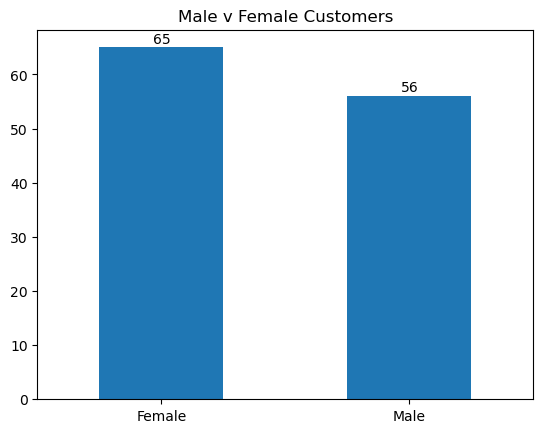

In [19]:
ax = plt.axes()
data['Gender'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Male v Female Customers')
plt.show()

In [20]:
# Age of customers

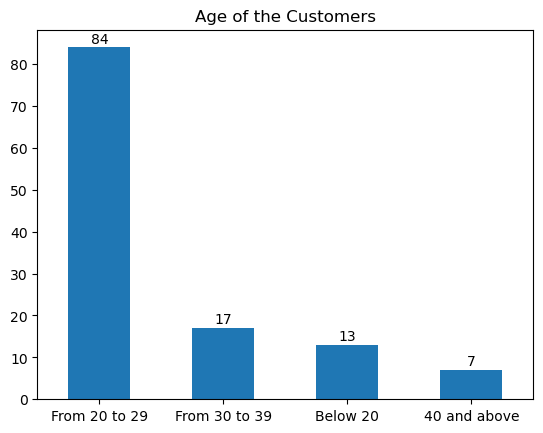

In [21]:
ax = plt.axes()
data['Age'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Age of the Customers')
plt.show()

In [22]:
# Employment status of the customers

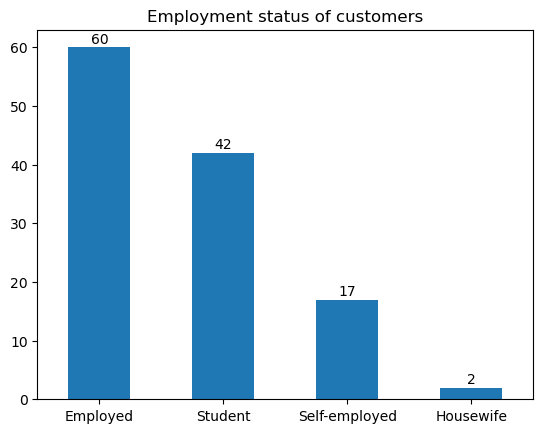

In [23]:
ax = plt.axes()
data['Employment_status'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Employment status of customers')
plt.show()

In [24]:
# Annual income of the customers

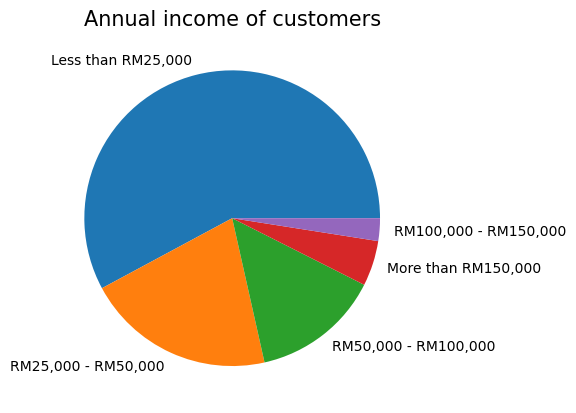

In [25]:
ax = plt.axes()
data['Annual_income'].value_counts().plot(kind='pie')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Annual income of customers',fontsize=15)
plt.ylabel(None)
plt.show()

Customer Profile analysis:
- There are slighlty more female customers then male
- Majority of the customers are in the age range of 20-29
- Most of the customers are employed 
- More than half of the customers earn an annual income of less than RM25,000.


In [26]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'Employment_status', 'Annual_income',
       'visit', 'takeaway_dinein', 'time_spent', 'nearest_outlet',
       'membership_card', 'frequent_purchase', 'average_spend', 'rate_quality',
       'rate_price', 'purchase_decision', 'rate_ambience', 'wifi_quality',
       'rate_service', 'rate_meetings', 'promotion_hear', 'continue_purchase'],
      dtype='object')

In [27]:
# How often customers visit Coffee House

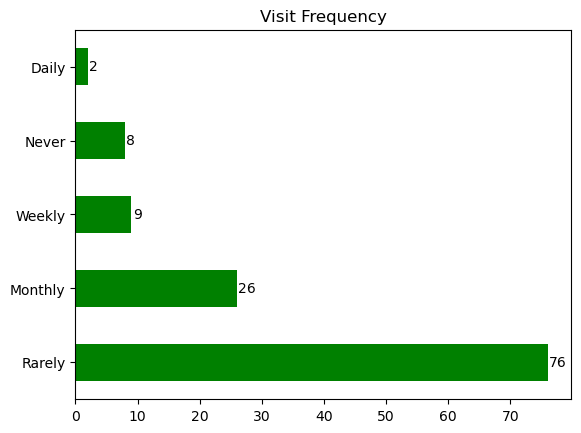

In [28]:
ax = plt.axes()
data['visit'].value_counts().plot.barh(color='g')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Visit Frequency')
plt.show()

In [29]:
# Do customers prefer dine-in or takeaway 

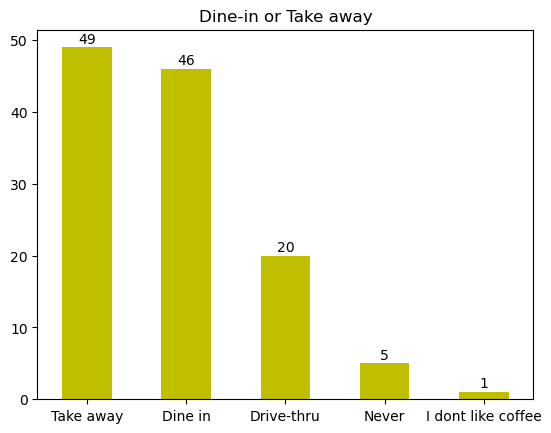

In [30]:
ax = plt.axes()
data['takeaway_dinein'].value_counts().plot.bar(color='y')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Dine-in or Take away')
plt.show()

In [31]:
# Time spent in Coffee House

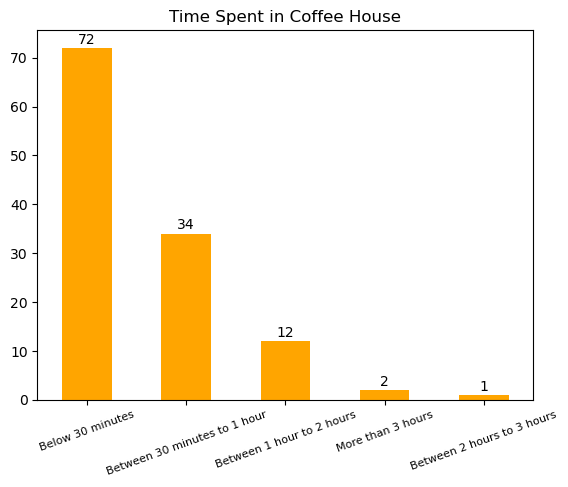

In [32]:
ax = plt.axes()
data['time_spent'].value_counts().plot.bar(color='orange')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=20,fontsize=8)
plt.title('Time Spent in Coffee House')
plt.show()

In [33]:
# nearest_outlet 

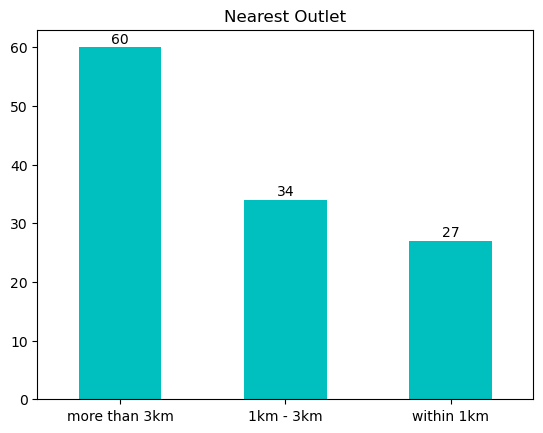

In [34]:
ax = plt.axes()
data['nearest_outlet'].value_counts().plot.bar(color='c')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Nearest Outlet')
plt.show()

In [35]:
# How many customers have a membership_card

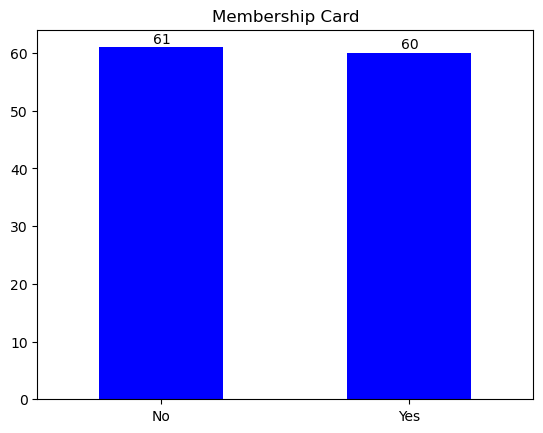

In [36]:
ax = plt.axes()
data['membership_card'].value_counts().plot.bar(color='b')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Membership Card')
plt.show()

In [37]:
#frequent_purchase

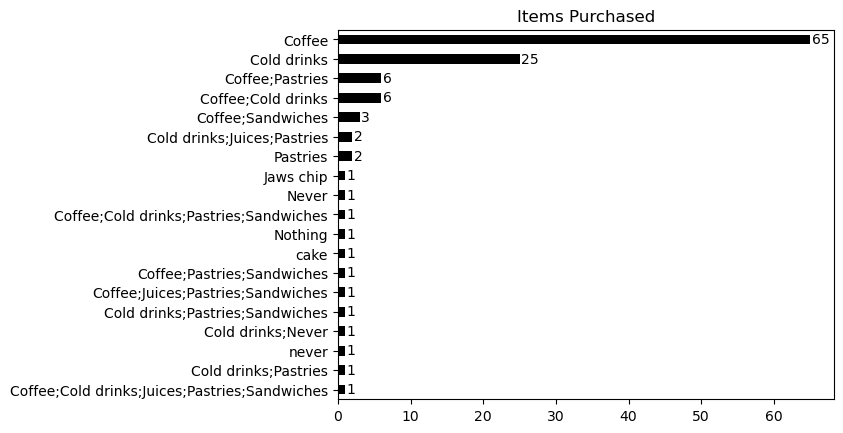

In [38]:
ax = plt.axes()
data['frequent_purchase'].value_counts(ascending=True).plot.barh(color='black')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Items Purchased')
plt.show()

In [39]:
# Average spend of the customers

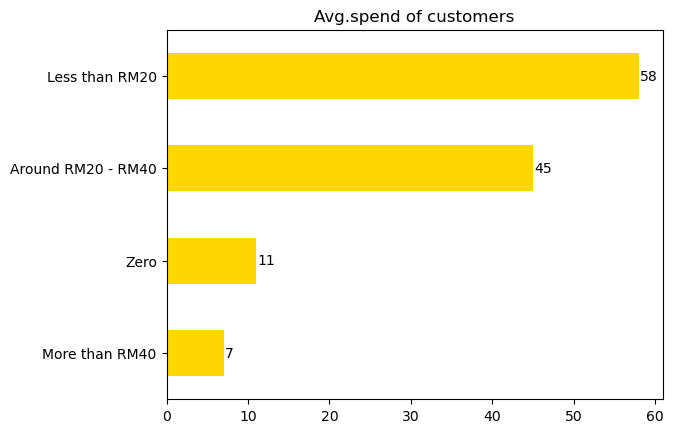

In [40]:
ax = plt.axes()
data['average_spend'].value_counts(ascending=True).plot.barh(color='gold')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Avg.spend of customers')
plt.show()

In [41]:
# How do customers hear about promotion

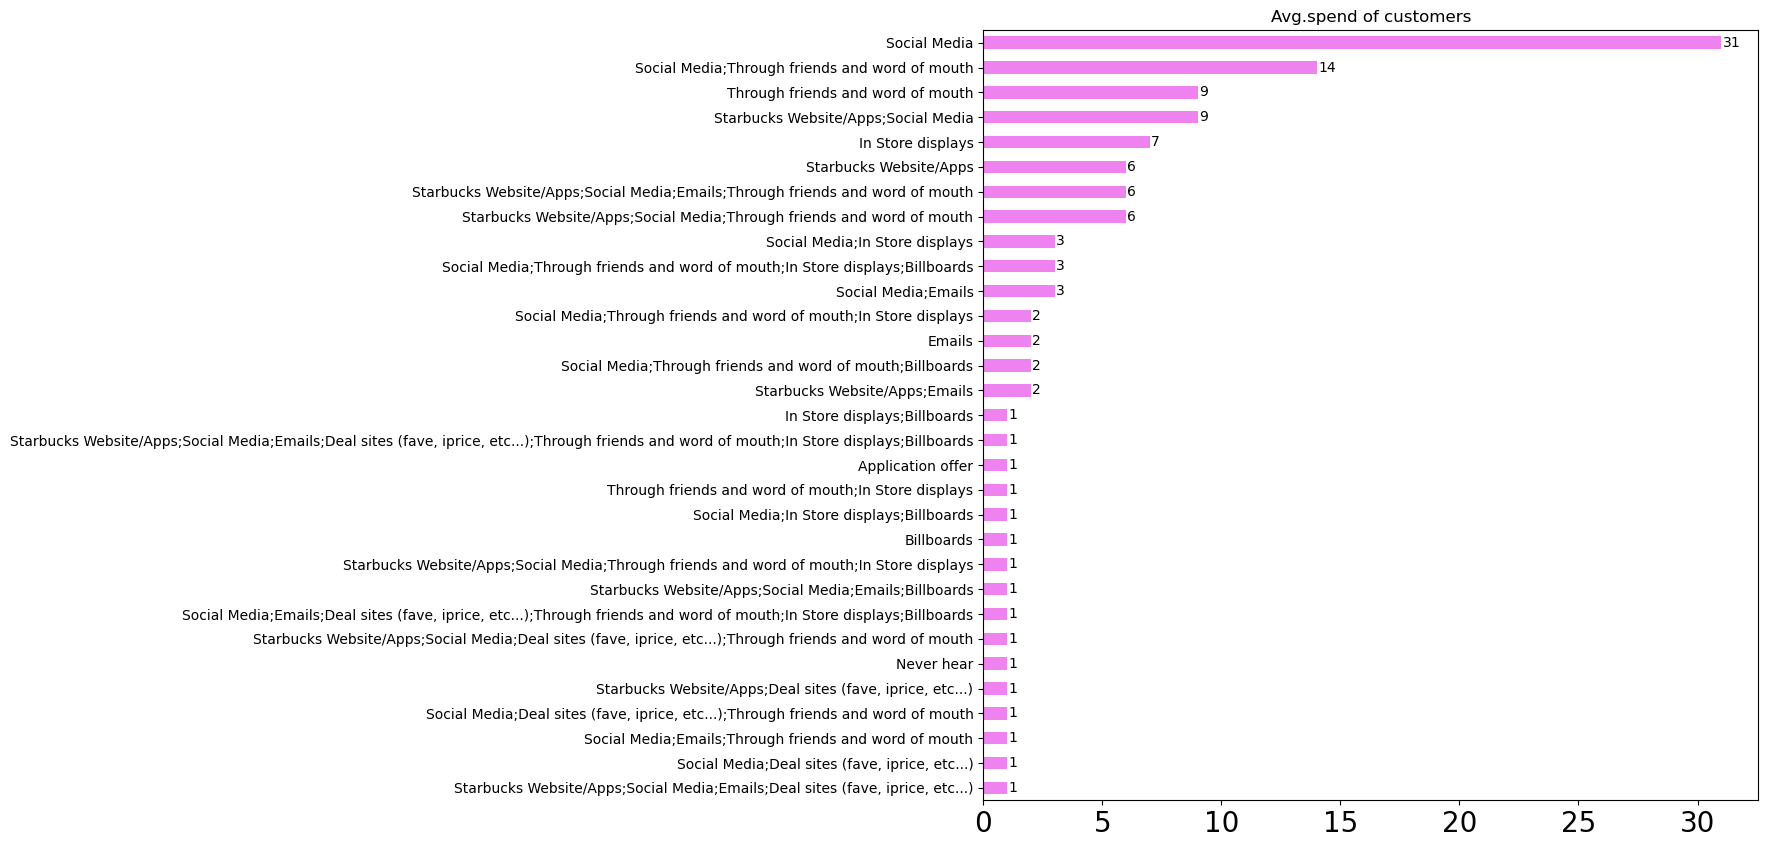

In [42]:
ax = plt.axes()
data['promotion_hear'].value_counts(ascending=True).plot.barh(color='violet',figsize=(10,10))
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(fontsize=20)
plt.title('Avg.spend of customers')
plt.show()

In [43]:
# Will customers continue purchasing

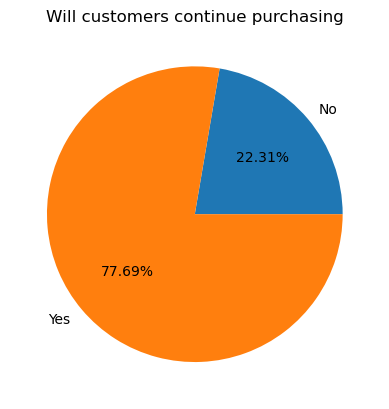

In [44]:
data['continue_purchase'].value_counts(ascending=True).plot(kind='pie',autopct='%0.2f%%')
plt.title('Will customers continue purchasing')
plt.ylabel(None)
plt.show()

- Majpority of the customers rarely visit the customers.
- Dine-in and take away are the most preferred ways of having a drink/meal.
- About 72 customers spend less than 30 minutes in the Coffee House.
- About 60 customers live more than 3km from their nearest Coffee House outlet.
- Half of the customers have a membership card.
- Coffee seperately is the most purchased item.
- On an average, customers spend less than RM20.
- Customers hear of promotions through Social Media, Word of mouth 
- 78% of customers will continue buying from Coffe House

In [45]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'Employment_status', 'Annual_income',
       'visit', 'takeaway_dinein', 'time_spent', 'nearest_outlet',
       'membership_card', 'frequent_purchase', 'average_spend', 'rate_quality',
       'rate_price', 'purchase_decision', 'rate_ambience', 'wifi_quality',
       'rate_service', 'rate_meetings', 'promotion_hear', 'continue_purchase'],
      dtype='object')

In [46]:
# Customer Ratings

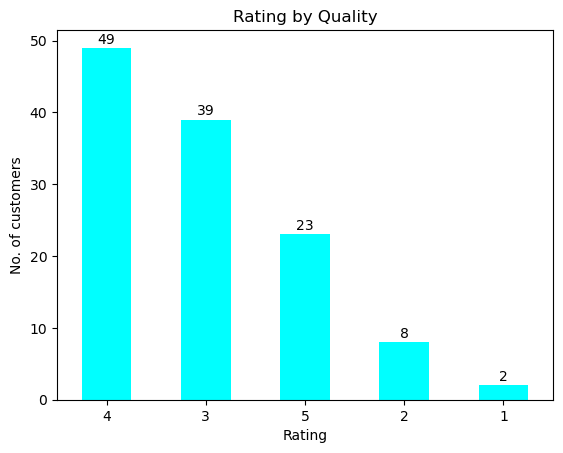

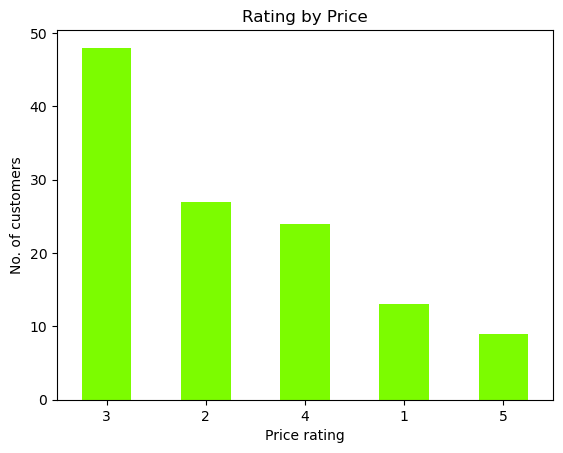

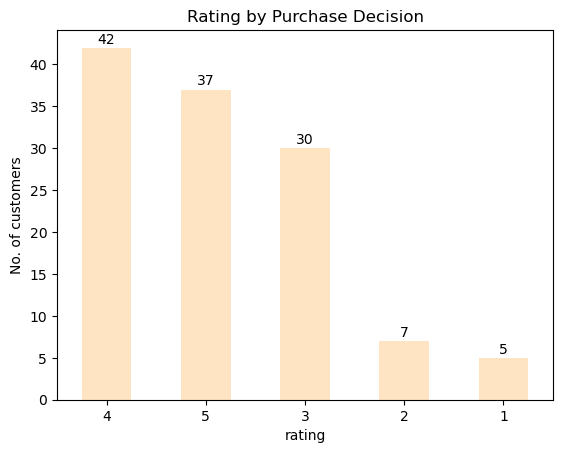

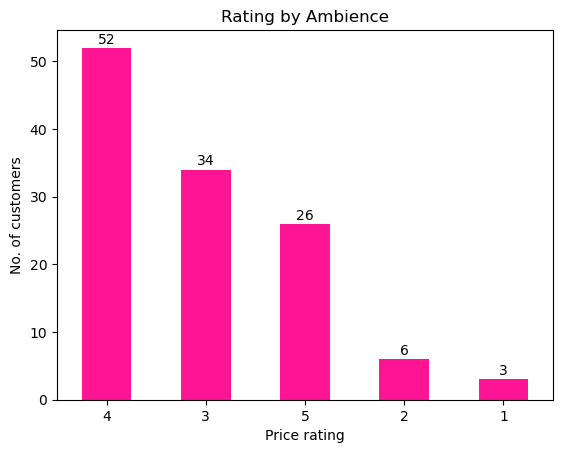

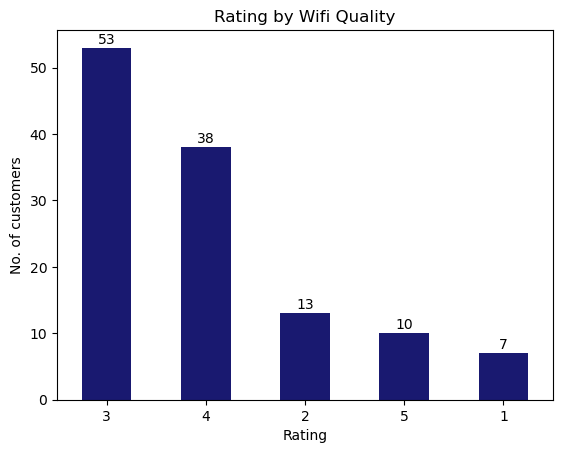

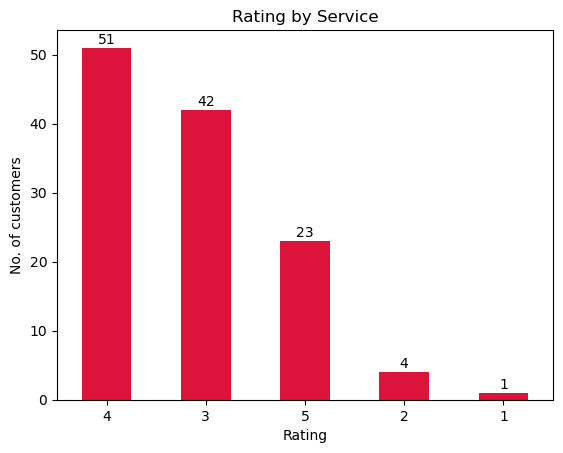

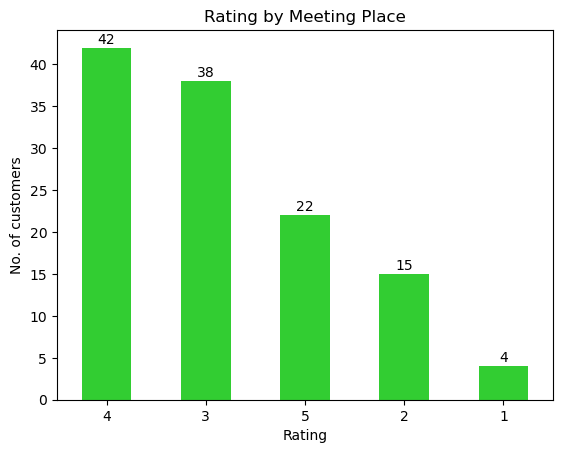

In [47]:
# Rating by Quality
ax = plt.axes()
data['rate_quality'].value_counts().plot.bar(color='aqua')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Quality')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Price
data['rate_price'].value_counts().plot.bar(color='lawngreen')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Price')
plt.xticks(rotation=0)
plt.xlabel('Price rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Purchase Decision
ax = plt.axes()
data['purchase_decision'].value_counts().plot.bar(color='bisque')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Purchase Decision')
plt.xticks(rotation=0)
plt.xlabel('rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by ambience
ax = plt.axes()
data['rate_ambience'].value_counts().plot.bar(color='deeppink')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Ambience')
plt.xticks(rotation=0)
plt.xlabel('Price rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by wifi quality
ax = plt.axes()
data['wifi_quality'].value_counts().plot.bar(color='midnightblue')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Wifi Quality')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Service
ax = plt.axes()
data['rate_service'].value_counts().plot.bar(color='crimson')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Service')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by meeting place
ax = plt.axes()
data['rate_meetings'].value_counts().plot.bar(color='limegreen')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Meeting Place')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()


- Most of the customers rate quality by 3 and 4
- Most of the customers rate Price by 3
- Most of the customers rate Purchase Decision by 4 and 5
- Most of the customers rate Wifi Quality by 3
- Most of the customers rate Service by 3 and 4
- Most of the customers rate Meeting Place  by 3 and 4


In [48]:
# Male v Female Analysis

In [49]:
data['Male'] = data['Gender'] == 'Male'

In [50]:
data['Female'] = data['Gender'] == 'Female'

In [51]:
gender_visit = pd.pivot_table(data=data, index='visit', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'}).reset_index()
gender_visit

,visit,Female,Male
0,Daily,0,2
1,Monthly,10,16
2,Never,6,2
3,Rarely,45,31
4,Weekly,4,5


In [52]:
n=5
r = np.arange(n)
width = 0.35

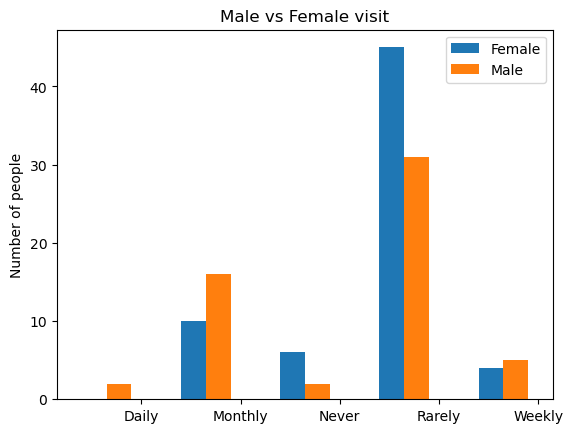

In [53]:
gender_visit.plot(kind='bar')
plt.ylabel("Number of people")
plt.title("Male vs Female visit")
plt.xticks(r+width,['Daily','Monthly','Never','Rarely','Weekly'],rotation=0) 
plt.legend()

plt.show()

In [54]:
# Membership subscription Male v Female

In [55]:
gen_member = data.groupby('membership_card')['Male','Female'].sum()
gen_member

C:\Users\chris\AppData\Local\Temp\ipykernel_3500\3977878476.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_member = data.groupby('membership_card')['Male','Female'].sum()


,Male,Female
membership_card,,
No,26,35
Yes,30,30


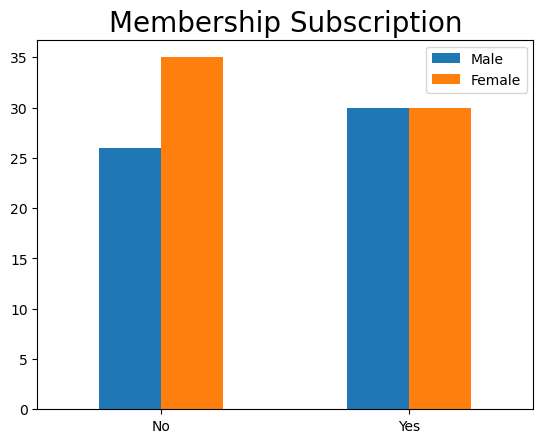

In [56]:
gen_member.plot(kind='bar')
plt.title('Membership Subscription',fontsize=20)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.show()

In [57]:
gender_spend = pd.pivot_table(data=data, index='average_spend', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'}).reset_index()
gender_spend

,average_spend,Female,Male
0,Around RM20 - RM40,22,23
1,Less than RM20,34,24
2,More than RM40,2,5
3,Zero,7,4


In [58]:
n=5
r = np.arange(n)
width = 0.35

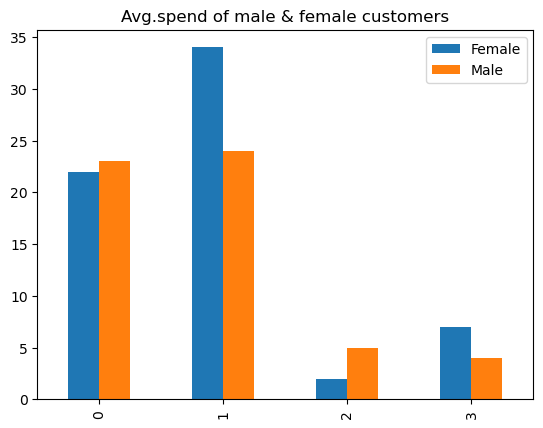

In [59]:
gender_spend.plot(kind='bar')
plt.title('Avg.spend of male & female customers')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.show()

In [60]:
Rating = data[['rate_quality',
       'rate_price', 'purchase_decision', 'rate_ambience', 'wifi_quality',
       'rate_service', 'rate_meetings']]

- Majority of the males visit coffee house daily , weekly and monthly
- Overall more males have a membership subscription

In [61]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'Employment_status', 'Annual_income',
       'visit', 'takeaway_dinein', 'time_spent', 'nearest_outlet',
       'membership_card', 'frequent_purchase', 'average_spend', 'rate_quality',
       'rate_price', 'purchase_decision', 'rate_ambience', 'wifi_quality',
       'rate_service', 'rate_meetings', 'promotion_hear', 'continue_purchase',
       'Male', 'Female'],
      dtype='object')

In [62]:
#Gender by quality rating
gender_qual = pd.pivot_table(data=data, index='rate_quality', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by price rating
gender_price = pd.pivot_table(data=data, index='rate_price', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by purchase decision
gender_purch = pd.pivot_table(data=data, index='purchase_decision', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by ambience rating
gender_amb = pd.pivot_table(data=data, index='rate_ambience', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by wifi quality 
gender_wifi = pd.pivot_table(data=data, index='wifi_quality', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by service rating 
gender_service = pd.pivot_table(data=data, index='rate_service', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

#Gender by hangout place rating 
gender_hangout = pd.pivot_table(data=data, index='rate_meetings', values=['Male', 'Female'], 
               aggfunc = {'Male':'sum', 'Female':'sum'})

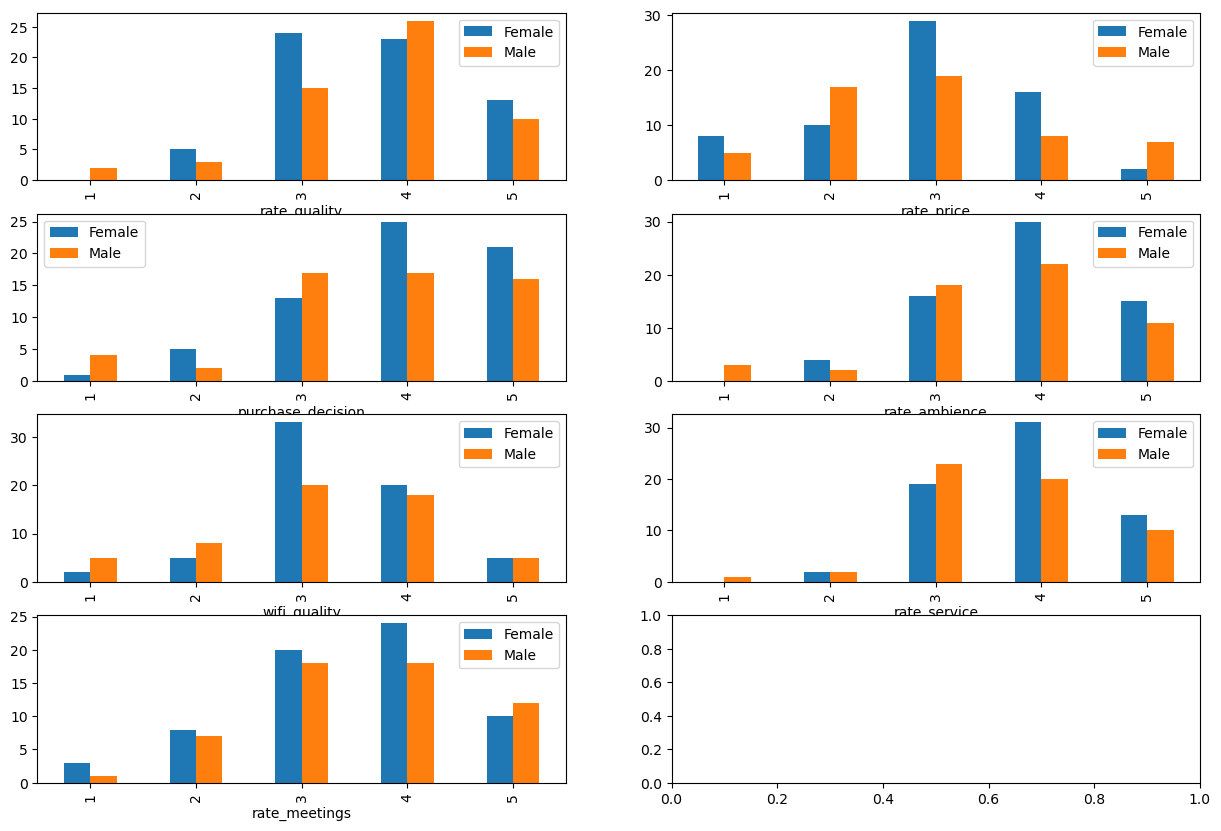

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=2)

gender_qual.plot(kind='bar',ax=axes[0,0],figsize=(15,10))
gender_price.plot(kind='bar',ax=axes[0,1],figsize=(15,10))
gender_purch.plot(kind='bar',ax=axes[1,0])
gender_amb.plot(kind='bar',ax=axes[1,1])
gender_wifi.plot(kind='bar',ax=axes[2,0])
gender_service.plot(kind='bar',ax=axes[2,1])
gender_hangout.plot(kind='bar',ax=axes[3,0])
plt.show()

Recommendations

- Create promotions on Social Media and Website/Apps which are the more popular ways that customers can hear of promotions.
- Increase sales and promotions to attract more customers.
- Improve on factors such as Wifi Quality and Service to improve customer satisfaction
- Gain and target more male visitors, since their spending per visit is generally higher; this can be done through targetting them via their memberships since men are more likely to be members than women.